<h1  style="color:#03363D">Plan Upgrade Prediction Model v3</h1>
<p  style="color:#03363D">by Sarah Kay: [skay@zendesk.com](mailto:skay@zendesk.com)</p>


<h3 style="color:#03363D">Project Problem and Hypothesis</h3>

I would like to identify the relationship between product feature usage in the core Zendesk Support product and plan upgrades amongst paying customers. The idea is to identify patterns of behavior that signify upgrade and to then use that information to drive more upgrades, as well as increase product adoption of features that indicate upgrade is likely. 

This is a classification issue, with the predicted outcome of a binary 'yes' or 'no' that a customer is likely to upgrade to a higher plan. I hypothesize that some feature will be more indicative than others particularly the behavior ratios I plan on creating to compare month over month behavior of customers in relation to themselves. This will likely tell us if people are ramping up or down, the assumption being that ramping up will lead to upgrade.

<h3 style="color:#03363D">Dataset</h3>

All data is coming from our internal Product Data Warehouse through the following SQL queries:</p>
- [upgraded](https://gist.github.com/zendeskskay/ce4e13f187d6ca6c101626744b930075) (snapshot)
- [not_upgraded](https://gist.github.com/zendeskskay/c36c130d873180c322aed222b93df3e4) (snapshot)
- [upgraded_customer_months](https://gist.github.com/zendeskskay/7161e6e7593509a9410f4c0e7eee264c) (month over month)
- [not_upgraded_customer_months](https://gist.github.com/zendeskskay/ef9d54d0704d6ce13998c3ce5fabf42b) (month over month)

<h4>Feature Descriptions:</h4>
- `upgraded_boolean`: the value we are trying to predict (1 = upgraded, 0 = not upgraded)

<h5>Account level metrics used for doing exploratory analysis</h5>
- `account_id`: unique customer identifier
- `year_month_won`: month/year combinition that the customer started paying
- `age_in_months`: age of each account in months at the time of observation
- `pre_upgrade_plan`: plan the customer was on at the time of upgrade (also converted into dummies for the model)

<h5>All `num_` features are continuous numeric variables</h5>
- `num_agents`: count of seats purchased by the customer
- `num_trig`: count of triggers, which fire specific actions when certain conditions are met (if, else, then)
- `num_automations`: count of automations, like triggers, but time based
- `num_tags`: count of tags applied across tickets, users and organizations
- `num_macros`: count of macros, or snippets of saved text that can be applied to tickets
- `num_groups`: count of total groups that agents can be assigned to
- `num_orgs`: count of total organizations that end users can belong to
- `num_fields`: count of custom fields on tickets
- `num_apps`: Apps are external applications that can be installed to extend the functionality of Support
- `num_tix_solved`: Tickets are the core of Zendesk and most accounts solve some number of these each month

<h5>All `enabled_` features are binary, 1 for on, 0 for off</h5>
- `enabled_HC`: Help Center is a content management system that let's customers self serve answers to common questions
- `enabled_redaction`: Redaction is a feature that let's you remove sensitive info like credit card #s
- `enabled_insights`: Insights is the integrated BI tool
- `enabled_talk`: Talk is the voice over IP feature
- `enabled_widget`: Web Widget is a feature that allows other Support features to be embedded in customer's websites
- `enabled_csat`: Customer Satisfaction Surveys allow users of our product to survey their end-users
- `enabled_hours`: Hours are business hours, which allow you to calculate metrics and set up triggers/automations in a way 
- `enabled_slas`: SLAs are Service Level Agreements, they allow you to set rules to manage the ticket queues more effectively for various customer groupings
- `enabled_HCcode`: Help Center Code is the use of HTML, CSS, and JavaScript to design a unique Help Center look and feel
- `enabled_community`: Community is the section of a Help Center where end user can post questions and feedback

<h5>The plans you can upgrade from, as dummy variables, calculated from the `pre_upgrade_plan` feature</h5>
- `Essential`: 
- `Plus`:
- `Professional`:
- `Regular`:
- `Starter`:
- `Team`:

<h3 style="color:#03363D">Domain Knowledge</h3>

I've worked at Zendesk for 3.25 yrs. Started in Support and moved to being an analyst 2yrs ago. I have a  lot of experience with how the product works, with our data infrastructure and with our business goals. This experience can help me to ensure the data is clean and to know when something looks off. It can help inform decisions about what features to include and which to throw out as well as which new features to engineer.

Unfortunately, there is not a lot of public research around upgrade models, particularly because the use cases almost always involve proprietary data. Not a lot of public data (i.e. government data, health data, etc) is used to predict upgrades ina  similar way. Internally, however we do have some data scienctists working on building models to predict churn and they have been very kind in advising me about my model. I also had a call with a data scientist at my boss's husband's company. He was very helpful in recommending that I user each customer/month combination as a unique observation to help deal with the issue of time.

<h3 style="color:#03363D">Project Concerns</h3>

Some questions I still have are around how to handle the concept of time and age with regards to various accounts. I tried segmenting my data by cohort (looking at a group of accounts won in the same month/year) to make sure they were all the same age and subjetc to the same influences of time around the same periods of their account maturity, but this made my dataset too small. Instead we decided to go with the individual observations for each customer month/year combination, but this makes the balance of those that upgrade vs those that don't even more extreme. The first time I ran my model this was apparent as I had a 97% accuracy score, because the model was always predicting not upgrade. I added in `class_weight='balanced'` which seems to have helped. 

I had to make sure I was comparing apples to apples by limiting the dataset to accounts won in the same year, which will prevent me from noticing if there is any trends around upgrading at the 1 year renewal mark. I'm only looking at Upgrades that took place between 01/01/2016 and 11/30/2016, hopefully I can get my hands on more data in the future.

It would help my model to know if customers were touched by marketing campaigns, sales calls, or other events that could influence their behavior.

I also would love to include data from outside my company's purview, including economic data, stock market data, company size, and other things that could help us to know which companies are growing and would likely buy more product.


The cost of my model being wrong is potentially misdirected sales and marketing campaigns, which could annoy current customers and potentially increase churn in a worst case scenario (which is kind of how we do marketing campaigns now). The benefit could be more upsell success and more revenuw for the company.

There is also the potential for some of the data to be incorrect, but the likelihood is low given that we are pulling usage data directly from our production databases.  

<h3 style="color:#03363D">Outcomes</h3>

My target audience is expecting something that resembles a product usage score, a 1-5 stating who are the low, medium and high users of the product. We have discussed the potential that product usage is not the only factor determining an upgrade and the there is a chance there are customers that have high usage and low probability to upgrade and visa versa. Hopefully we will be able to learn the correlation between the two after this model is built.

They believe from their initial analysis that there are 7 magic features that lead to upgrading:
1. Apps
2. SLAs
3. Help Center
4. Business Hours
- Ticket Forms
- CSat
- Roles and Permissions

I believe this model will confirm some of those features and perhaps debunk others.

Any insight gained from this model would be considered a success, but we would love something that is pretty accurate so we can operationalize it. If the model is a complete bust, no harm no foul. We will continue to search for ways to use data to improve our business processes.

<h2 style="color:#03363D">Exploratory Analysis</h2>
<h3 style="color:#03363D">Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set(style="white")

<h3 style="color:#03363D">Import Data</h3>

In [24]:
upgraded = pd.read_csv('upgraded.csv')
not_upgraded = pd.read_csv('not_upgraded.csv')

In [26]:
print upgraded.isnull().sum()
print not_upgraded.isnull().sum()

account_id                   0
year_month_won               0
upgraded_boolean             0
age_in_months                0
pre_upgrade_plan             0
post_upgrade_plan            0
upgrade_levels               0
num_agents                 960
mrr_pre_upgrade            185
mrr_post_upgrade            14
mrr_delta                  198
num_trig                   968
num_automations            968
num_tags                   968
num_macros                 968
num_groups                 971
num_orgs                   971
num_fields                 971
enabled_HC                   0
enabled_redaction          959
enabled_insights          2007
enabled_talk               959
enabled_widget             959
enabled_csat               959
enabled_hours              959
enabled_slas               959
enabled_HCcode            1442
enabled_community         1571
num_apps                     0
num_tix_solved_last60d     117
dtype: int64
account_id                    0
year_month_won           

In [4]:
upgraded = upgraded.fillna(0)
not_upgraded = not_upgraded.fillna(0)

In [5]:
total_accounts = round((len(not_upgraded) + len(upgraded)),0)
pct_upgraded = round(len(upgraded),0)/total_accounts

print "%s Upgrades" % len(upgraded)
print "%s Non Upgrade Accounts" % len(not_upgraded)
print "%s Total Accounts" % total_accounts
print "%s percent of customers won between 11/01/2015 and 11/30/2016 upgraded in 2016." % (round((pct_upgraded *100),2))

2073 Upgrades
15561 Non Upgrade Accounts
17634.0 Total Accounts
11.76 percent of customers won between 11/01/2015 and 11/30/2016 upgraded in 2016.


In [6]:
u = upgraded.groupby(['year_month_won','age_in_months'])[['upgraded_boolean']].count()
nu = not_upgraded.groupby(['year_month_won'])[['upgraded_boolean']].count()
df = pd.concat([upgraded,not_upgraded], axis=0, join='outer')

In [7]:
df.head()

,account_id,year_month_won,upgraded_boolean,age_in_months,pre_upgrade_plan,post_upgrade_plan,upgrade_levels,num_agents,mrr_pre_upgrade,mrr_post_upgrade,...,enabled_insights,enabled_talk,enabled_widget,enabled_csat,enabled_hours,enabled_slas,enabled_HCcode,enabled_community,num_apps,num_tix_solved_last60d
0,312069,201604,1,6,Team,Professional,1,4.0,76.0,76.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,298.0
1,509860,201511,1,2,Plus,Enterprise,1,4.0,236.0,1250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,83.0
2,528477,201603,1,8,Professional,Enterprise,1,4.0,236.0,236.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7,1750.0
3,627758,201512,1,3,Essential,Professional,2,3.0,27.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,411.0
4,630417,201602,1,7,Essential,Professional,2,8.0,45.0,45.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1008.0


In [8]:
df.year_month_won.unique()

array([201604, 201511, 201603, 201512, 201602, 201601, 201606, 201605,
       201608, 201607, 201609, 201611, 201610])

In [9]:
df.groupby(['pre_upgrade_plan','upgraded_boolean']).account_id.count()

pre_upgrade_plan     upgraded_boolean
0                    0                      6
Enterprise           0                    551
Enterprise (Legacy)  0                    280
Enterprise Elite     0                     12
Essential            0                   4725
                     1                   1294
Plus                 0                    225
                     1                     14
Professional         0                   3870
                     1                    192
Regular              0                    112
                     1                     17
Starter              0                    302
                     1                     18
Team                 0                   5478
                     1                    538
Name: account_id, dtype: int64

In [10]:
#REMOVE ALL ENTERPRISE PLANS (since it's the highest plan, no upgrading)
df = df[(df.pre_upgrade_plan != 0) & (df.pre_upgrade_plan != 'Enterprise Elite') & (df.pre_upgrade_plan != 'Enterprise') & (df.pre_upgrade_plan != 'Enterprise (Legacy)')]

In [11]:
#DROP POST-UPGRADE PLAN SINCE WE HAVE UPGRADE LEVELS
df = df.drop(['post_upgrade_plan','upgrade_levels'], axis = 1)

In [12]:
#CREATE DUMMIES FOR THE PRE-UPGRADE PLAN AND DROP THE ORIGINAL COLUMN
pre_upgrade_plan_df = pd.get_dummies(df.pre_upgrade_plan, prefix = None)
df2 = pd.concat([df, pre_upgrade_plan_df], axis = 1)
df2 = df2.drop('pre_upgrade_plan', axis = 1)

In [13]:
df2.head()

,account_id,year_month_won,upgraded_boolean,age_in_months,num_agents,mrr_pre_upgrade,mrr_post_upgrade,mrr_delta,num_trig,num_automations,...,enabled_HCcode,enabled_community,num_apps,num_tix_solved_last60d,Essential,Plus,Professional,Regular,Starter,Team
0,312069,201604,1,6,4.0,76.0,76.0,0.0,13.0,6.0,...,0.0,1.0,2,298.0,0.0,0.0,0.0,0.0,0.0,1.0
1,509860,201511,1,2,4.0,236.0,1250.0,1014.0,10.0,1.0,...,0.0,0.0,0,83.0,0.0,1.0,0.0,0.0,0.0,0.0
2,528477,201603,1,8,4.0,236.0,236.0,0.0,10.0,5.0,...,1.0,0.0,7,1750.0,0.0,0.0,1.0,0.0,0.0,0.0
3,627758,201512,1,3,3.0,27.0,59.0,32.0,5.0,1.0,...,0.0,0.0,0,411.0,1.0,0.0,0.0,0.0,0.0,0.0
4,630417,201602,1,7,8.0,45.0,45.0,0.0,6.0,1.0,...,0.0,1.0,1,1008.0,1.0,0.0,0.0,0.0,0.0,0.0


/opt/anaconda/envs/python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


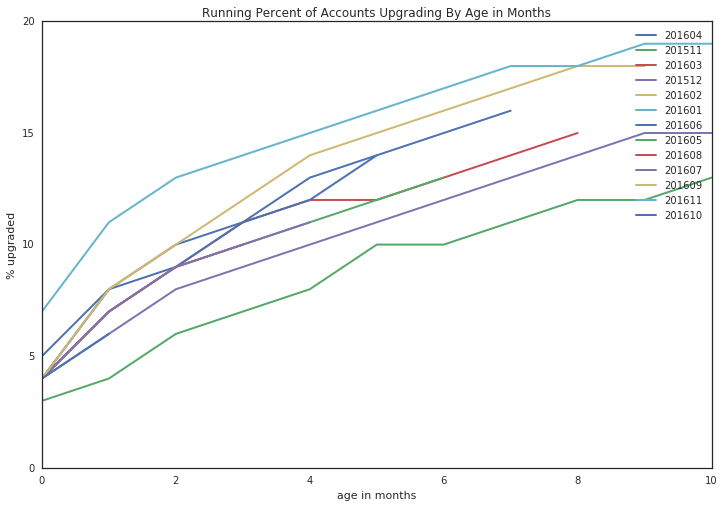

In [14]:
#RUNNING UPGRADE PERCENT AND SURVIVAL GRAPH FOR ALL COHORTS

for i in df2.year_month_won.unique():
    b = df2[(df2.upgraded_boolean == 1) & (df2.year_month_won == i)].groupby('age_in_months')[['upgraded_boolean']].count()
    b.reset_index(level=0, inplace=True)
    b['running_upgrade_pct'] = ""
    a = len(df2[df2.year_month_won == i])
    c = len(df2[df2.year_month_won == i])
#    print 'w' + str(i)
#    print a
    for n in b.index:
        y = b[b.index == n].upgraded_boolean.values[0]
        a = a - y
        b.running_upgrade_pct.iloc[n] = 100 - round(a*1./c*100)
    #color = ['r', 'b', 'g', 'k', 'm']
#    print b 
    ax = b.running_upgrade_pct.plot(kind = 'line', figsize = (12, 8), 
           title = 'Running Percent of Accounts Upgrading By Age in Months',
           #color = '#78A300',
           linewidth = 2,
       )
    plt.ylim([0, 20])
    ax.set_xlabel("age in months")
    ax.set_ylabel("% upgraded")
    labels = df2.year_month_won.unique()
    ax.legend(labels)

In [15]:
w201601 = df2[df2.year_month_won  == 201601]

In [16]:
#SET COHORT TO BE ANALYZED
cohort = w201601

upgraded = cohort.query('upgraded_boolean == 1').fillna(0)
not_upgraded = cohort.query('upgraded_boolean == 0').fillna(0)

print len(cohort)
print len(upgraded)

1114
215


In [17]:
cohort.columns

Index([u'account_id', u'year_month_won', u'upgraded_boolean', u'age_in_months',
       u'num_agents', u'mrr_pre_upgrade', u'mrr_post_upgrade', u'mrr_delta',
       u'num_trig', u'num_automations', u'num_tags', u'num_macros',
       u'num_groups', u'num_orgs', u'num_fields', u'enabled_HC',
       u'enabled_redaction', u'enabled_insights', u'enabled_talk',
       u'enabled_widget', u'enabled_csat', u'enabled_hours', u'enabled_slas',
       u'enabled_HCcode', u'enabled_community', u'num_apps',
       u'num_tix_solved_last60d', u'Essential', u'Plus', u'Professional',
       u'Regular', u'Starter', u'Team'],
      dtype='object')

In [18]:
#REMOVE UNWANTED FEATURES 
features_to_remove = ['account_id', 'year_month_won', 'mrr_post_upgrade']
limited_features = cohort.drop(features_to_remove, axis = 1)

#CREATE LIST OF FEATURE NAMES
features = limited_features.columns.tolist()

#PASS LIST INTO A DATAFRAME FOR SORTING
v1 = pd.DataFrame(features) 

#CREATE TWO GROUPS: BINARY AND CONTINUOUS FOR COMPARING 
binary_features = v1[v1[0].str.contains("enabled")][0].tolist()
continuous_features = v1[v1[0].str.contains("num_")][0].tolist()
continuous_features += ['age_in_months'] 

In [19]:
summary_stats = ['min','25%','50%','75%','max','mean']

upgrade_distributions = upgraded[continuous_features].describe().transpose().round(1)[summary_stats]
not_upgraded_distributions = not_upgraded[continuous_features].describe().transpose().round(1)[summary_stats]

upgrade_frequency_table = pd.DataFrame(index = [0,1])
not_upgraded_frequency_table = pd.DataFrame(index = [0,1])

for feature in binary_features:                                                    
    upgrade_frequency_table[feature] = upgraded[feature].value_counts() / len(upgraded[feature]) * 100

for feature in binary_features:                                                   
    not_upgraded_frequency_table[feature] = not_upgraded[feature].value_counts() / len(not_upgraded[feature]) * 100


upgrade_frequency_table = upgrade_frequency_table.transpose().round(1)         
not_upgraded_frequency_table = not_upgraded_frequency_table.transpose().round(1)
upgrade_frequency_table.columns = ['False (%)','True (%)']                         
not_upgraded_frequency_table.columns = ['False (%)','True (%)']                      

<h2 style="color:#03363D">Distributions of Continuous Variables</h2>
<p>Looking at the distribution of all the continuous numeric variables accross the two cohorts, upgraded and non-upgraded can show us some variation in the behaviors between them.</p>

<h4 style="color:#37B8AF">UPGRADED:</h4>

In [20]:
upgrade_distributions.sort_index(ascending=True)

,min,25%,50%,75%,max,mean
age_in_months,0.0,0.0,1.0,4.0,10.0,2.4
num_agents,0.0,0.0,1.0,2.0,29.0,1.8
num_apps,0.0,0.0,0.0,1.0,17.0,0.7
num_automations,0.0,0.0,0.0,1.0,11.0,0.8
num_fields,0.0,0.0,0.0,0.0,19.0,1.1
num_groups,0.0,0.0,0.0,1.0,17.0,1.0
num_macros,0.0,0.0,0.0,4.0,207.0,4.2
num_orgs,0.0,0.0,0.0,1.0,13093.0,81.1
num_tags,0.0,0.0,0.0,8.5,52909.0,711.3
num_tix_solved_last60d,0.0,2.0,54.0,353.5,85492.0,1290.5


<h4 style="color:#37B8AF">NOT UPGRADED:</h4>

In [21]:
not_upgraded_distributions.sort_index(ascending=True)

,min,25%,50%,75%,max,mean
age_in_months,10.0,10.0,10.0,10.0,10.0,10.0
num_agents,1.0,1.0,2.0,5.0,120.0,4.3
num_apps,0.0,0.0,1.0,2.0,19.0,1.3
num_automations,0.0,1.0,1.0,1.0,22.0,1.5
num_fields,0.0,0.0,0.0,2.0,99.0,2.4
num_groups,1.0,1.0,1.0,2.0,26.0,2.2
num_macros,0.0,4.0,4.0,5.5,206.0,9.8
num_orgs,0.0,1.0,1.0,2.0,6739.0,46.7
num_tags,0.0,2.0,35.0,601.5,4166923.0,8828.1
num_tix_solved_last60d,0.0,4.0,118.0,852.5,728400.0,4822.0


<h2 style="color:#03363D">One-Way ANOVA</h2>

<span style="color:#37B8AF">**Do any of the group means differ from one another in any statistically significant way?**</span>

<p>The one-way ANOVA tests the significance of the variation between groups (in this case the upgraded vs non-upgraded accounts).</p>

<span style="color:#B20000">*p-value <= 0.05 is considered significant*</span>

**Making the significant variables:**
- age_in_months
- num_automations 		
- num_trig
- num_groups
- num_macros
- num_apps
- num_agents
- num_fields

In [22]:
# compute one-way ANOVA P value 
anova = pd.DataFrame(index = [0,1])

for feature in continuous_features:
     anova[feature] = stats.f_oneway(upgraded[feature],not_upgraded[feature]) 

anova = anova.transpose().round(5)
anova.columns = ['F-stat','P-value']
anova.sort_index(ascending=True)

,F-stat,P-value
age_in_months,6385.35676,0.00000
num_agents,24.15559,0.00000
num_apps,13.68244,0.00023
num_automations,45.94441,0.00000
num_fields,8.95522,0.00283
num_groups,35.35649,0.00000
num_macros,17.49938,0.00003
num_orgs,0.71993,0.39635
num_tags,0.70457,0.40143
num_tix_solved_last60d,2.35042,0.12553


<h2 style="color:#03363D">Histograms of the Continuous Variables</h2>

<span style="color:#37B8AF">**We can see that most of these variables have long right tails and will need to be transformed before building the model**</span>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae167e40d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fae131f3ad0>]], dtype=object)

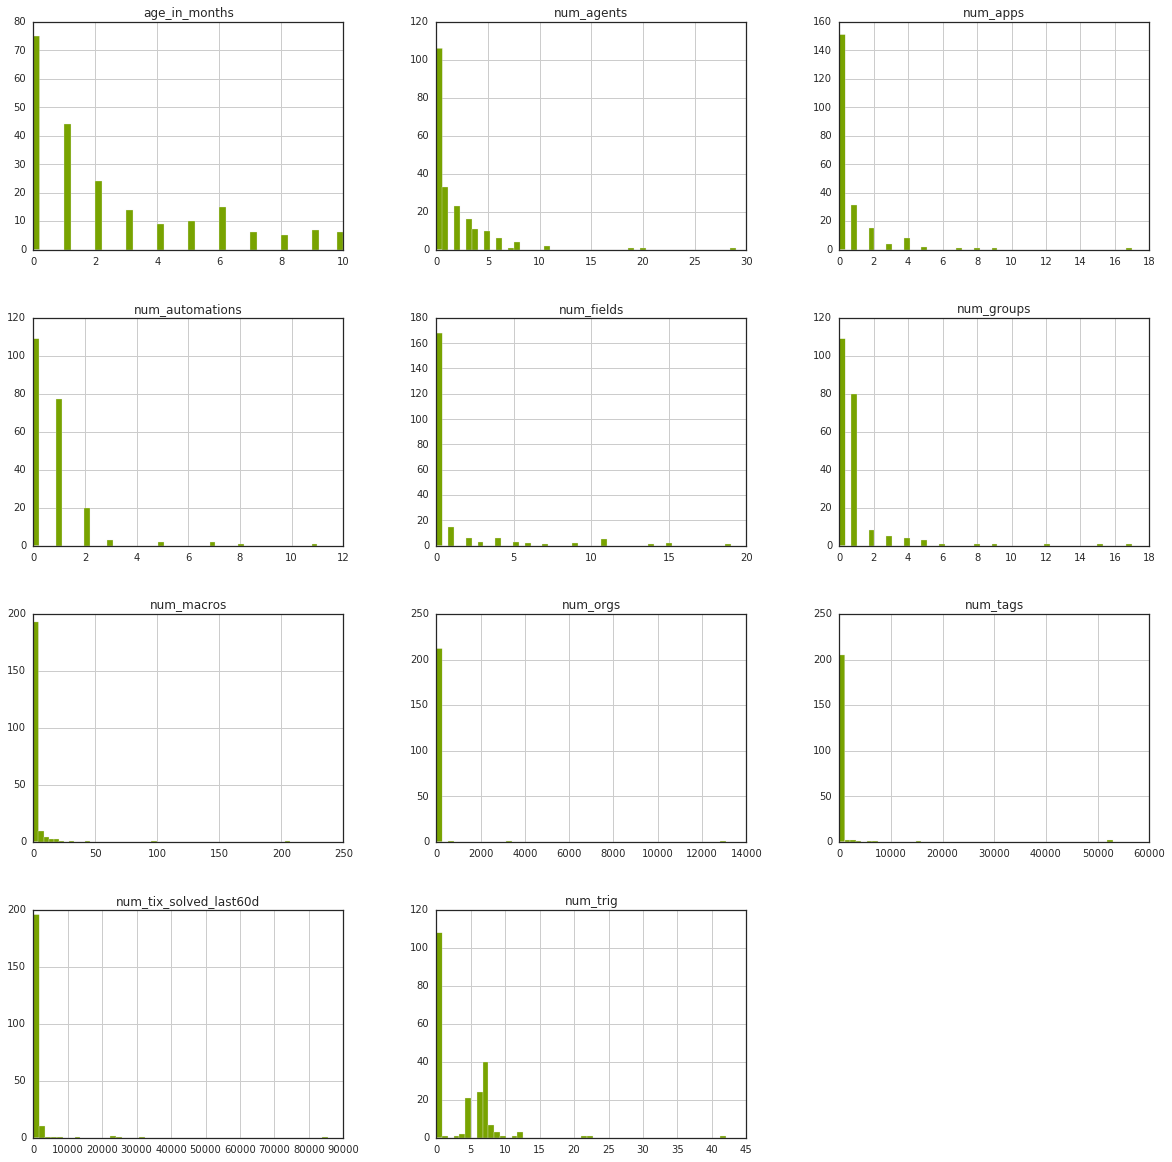

In [23]:
upgraded[continuous_features].hist(color='#78A300', bins=50, figsize = (20, 20))

<h2 style="color:#03363D">Frequency Tables for Binary Variables</h2>
<h4 style="color:#37B8AF">UPGRADED:</h4>

In [84]:
upgrade_frequency_table.sort_index(ascending=True)

,False (%),True (%)
enabled_HC,75.3,24.7
enabled_HCcode,91.2,8.8
enabled_community,79.5,20.5
enabled_csat,96.3,3.7
enabled_hours,93.0,7.0
enabled_insights,98.1,1.9
enabled_redaction,100.0,NaN
enabled_slas,99.5,0.5
enabled_talk,96.3,3.7
enabled_widget,74.9,25.1


<h4 style="color:#37B8AF">NOT UPGRADED:</h4>

In [85]:
not_upgraded_frequency_table.sort_index(ascending=True)

,False (%),True (%)
enabled_HC,52.3,47.7
enabled_HCcode,78.0,22.0
enabled_community,36.2,63.8
enabled_csat,87.3,12.7
enabled_hours,78.4,21.6
enabled_insights,84.3,15.7
enabled_redaction,97.4,2.6
enabled_slas,98.4,1.6
enabled_talk,92.2,7.8
enabled_widget,37.7,62.3


<h2 style="color:#03363D">Chi Square Test of Goodness of Fit</h2>

<span style="color:#37B8AF">**Is the variation we see between the groups in the binary variables statistically significant?**</span>

<p>The Chi Square Test tests the significance of the variation between groups (in this case the upgraded vs non-upgraded accounts).</p>

<span style="color:#B20000">*p-value <= 0.05 is considered significant*</span>

**Making none of these variables statistically significant between the groups**

In [28]:
# compute chi-square P value 
chi_square = pd.DataFrame(index = [0,1])
bf = cohort[binary_features].columns.tolist()

for feature in bf:
    x = stats.chi2_contingency(pd.crosstab(cohort['upgraded_boolean'],cohort[feature]))    
    x_sqr = x[0]
    p_value = x[1]
    chi_square[feature] = x_sqr, p_value
    
chi_square = chi_square.transpose().round(5)
chi_square.columns = ['X-squared','P-value']
chi_square.sort_values(by = "P-value")

,X-squared,P-value
enabled_HC,36.68090,0.00000
enabled_insights,28.07612,0.00000
enabled_widget,95.43137,0.00000
enabled_hours,23.32640,0.00000
enabled_community,130.45947,0.00000
enabled_HCcode,18.40556,0.00002
enabled_csat,13.37875,0.00025
enabled_redaction,4.42250,0.03547
enabled_talk,3.80187,0.05120
enabled_slas,0.84431,0.35817


<h2 style="color:#03363D">Checking Correlations</h2>
<p>Because we are trying to predict a binary variable (one which can be either 1 or 0) we want to test the correlations between the dependent variable `y` (a nominal variable) and the various independent variables `x` using various correlation methods:</p>
- [Point Biserial](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient) for continuous quantitative independent variables  
- [Pearson's Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) for the nominal independent variables. 
[source](https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm)

In [29]:
pearson = pd.DataFrame(index = ['Pearson\'s Coefficient', 'p-value'])
pointbiserial = pd.DataFrame(index = ['Point Biserial', 'p-value'])

for feature in binary_features:
    pearson[feature] = stats.pearsonr(cohort[feature],cohort['upgraded_boolean'])

for feature in continuous_features:
    pointbiserial[feature] = stats.pointbiserialr(cohort[feature],cohort['upgraded_boolean'])

pearson = pearson.transpose().round(5)
pointbiserial = pointbiserial.transpose().round(5)

In [30]:
pearson.sort_values(by = "p-value", ascending = False)

,Pearson's Coefficient,p-value
enabled_slas,-0.03740,0.21231
enabled_talk,-0.06288,0.03588
enabled_redaction,-0.07101,0.01778
enabled_csat,-0.11323,0.00015
enabled_HCcode,-0.13141,0.00001
enabled_HC,-0.18375,0.00000
enabled_insights,-0.16213,0.00000
enabled_widget,-0.29497,0.00000
enabled_hours,-0.14762,0.00000
enabled_community,-0.34450,0.00000


In [31]:
pointbiserial.sort_values(by = "Point Biserial", ascending = False)

,Point Biserial,p-value
num_orgs,0.02544,0.39635
num_tags,-0.02516,0.40143
num_tix_solved_last60d,-0.04593,0.12553
num_fields,-0.08938,0.00283
num_apps,-0.11025,0.00023
num_macros,-0.12447,0.00003
num_agents,-0.14581,0.00000
num_trig,-0.15947,0.00000
num_groups,-0.17554,0.00000
num_automations,-0.19919,0.00000


<h3 style="color:#03363D">Collinearity</h3> 
<p>**It is important to check for collinearity amongst the independent variables**</p>

Collinearity is when two variables are strongly correlated and can therefore be predicted by one another. This phenomenon can skew the effect the input variables have on your model.

The below heatmap helps us to navigate the correlation matrix below it. Blue = 0 and Red = 1 and we've removed anything above 0.4.

In [50]:
corr = cohort[features].corr().round(2)

corr

,upgraded_boolean,age_in_months,num_agents,mrr_pre_upgrade,mrr_delta,num_trig,num_automations,num_tags,num_macros,num_groups,...,enabled_HCcode,enabled_community,num_apps,num_tix_solved_last60d,Essential,Plus,Professional,Regular,Starter,Team
upgraded_boolean,1.00,-0.92,-0.15,-0.11,0.27,-0.16,-0.20,-0.03,-0.12,-0.18,...,-0.13,-0.34,-0.11,-0.05,0.24,-0.05,-0.19,-0.01,-0.03,-0.07
age_in_months,-0.92,1.00,0.17,0.11,-0.20,0.18,0.27,0.03,0.17,0.21,...,0.16,0.42,0.14,0.05,-0.27,0.04,0.18,0.01,0.03,0.10
num_agents,-0.15,0.17,1.00,0.93,0.05,0.35,0.31,0.11,0.34,0.63,...,0.14,0.19,0.31,0.43,-0.23,0.11,0.24,-0.01,-0.01,-0.00
mrr_pre_upgrade,-0.11,0.11,0.93,1.00,0.11,0.39,0.31,0.13,0.36,0.61,...,0.18,0.18,0.35,0.44,-0.30,0.16,0.41,-0.01,-0.03,-0.09
mrr_delta,0.27,-0.20,0.05,0.11,1.00,-0.01,0.05,-0.01,-0.01,0.08,...,0.06,-0.01,0.02,0.01,-0.04,-0.02,0.05,-0.00,-0.01,0.00
num_trig,-0.16,0.18,0.35,0.39,-0.01,1.00,0.28,0.07,0.31,0.44,...,0.19,0.18,0.28,0.26,-0.20,0.06,0.20,-0.00,-0.00,0.01
num_automations,-0.20,0.27,0.31,0.31,0.05,0.28,1.00,0.04,0.35,0.33,...,0.20,0.25,0.37,0.23,-0.31,0.12,0.27,-0.01,0.00,0.05
num_tags,-0.03,0.03,0.11,0.13,-0.01,0.07,0.04,1.00,0.23,0.10,...,-0.01,0.04,0.05,0.10,-0.04,0.00,0.09,-0.00,-0.00,-0.03
num_macros,-0.12,0.17,0.34,0.36,-0.01,0.31,0.35,0.23,1.00,0.32,...,0.10,0.12,0.24,0.45,-0.16,0.01,0.17,-0.01,-0.01,0.01
num_groups,-0.18,0.21,0.63,0.61,0.08,0.44,0.33,0.10,0.32,1.00,...,0.19,0.24,0.36,0.33,-0.31,0.09,0.24,0.00,-0.01,0.07


In [60]:
# figure = plt.figure(figsize=(20,20))
# subplot = figure.add_subplot(1, 1, 1)
# figure.colorbar(subplot.matshow(corr))
# subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
# subplot.set_yticklabels([None] + list(corr.columns))

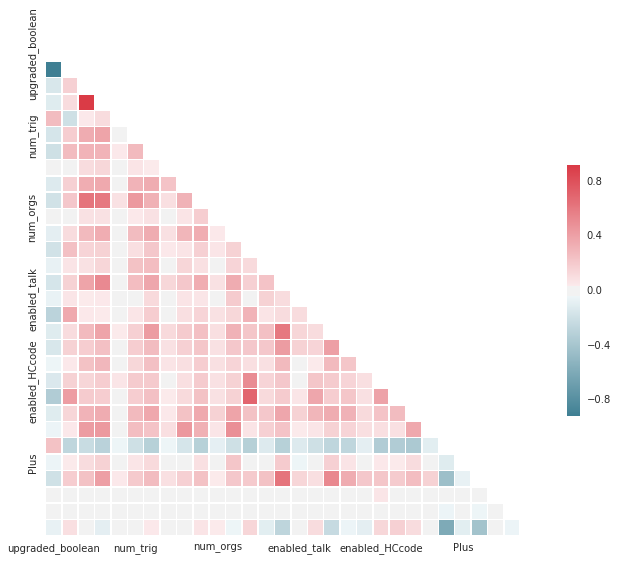

In [59]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
#subplot.set_yticklabels([None] + list(corr.columns), rotation = 90)

In [ ]:
c = pd.DataFrame(correl.abs().unstack(), columns = ['Correlation'])
c.index.names = ['Variable 1','Variable 2']
c.reset_index(inplace=True)  
c.sort_values(by = 'Correlation', ascending = False)
t = c[(c['Correlation'] >= .4) & (c['Correlation'] < 1)].sort_values(by = 'Correlation', ascending = False)
t1 = t.iloc[::2, :]
print t1

correl_drop_variables = t1['Variable 1'].tolist()
variables_to_remove = variables_to_remove + correl_drop_variables